In [26]:
import pandas as pd
import numpy as np
import itertools, csv

1703 rows of qcd data
4605 rows of dihiggs data
Index(['hh_mass', 'h1_mass', 'h2_mass'], dtype='object') hh_mass


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe43296b908>]],
      dtype=object)

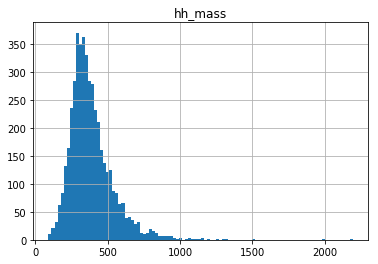

In [30]:
# *** 0. Import Dataset
qcd_raw = pd.read_csv('../higgsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../higgsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")
#print(hh_raw.columns)

variableNames = ['hh_mass', 'h1_mass', 'h2_mass']
#variableNames = ['hh_mass', 'h1_mass', 'h2_mass', 'deltaR(h1, h2)', 'deltaR(h1 jets)', 'deltaR(h2 jets)']

hh_reducedData  = hh_raw[variableNames]
qcd_reducedData = qcd_raw[variableNames]
print(hh_reducedData.columns, variableNames[0])
hh_reducedData.hist(column='hh_mass', bins=100)


In [49]:
def returnBestCutValue( _signal, _background, _method='S/B'):
    """find best cut according to user-specified significance metric"""
    
    _bestSignificance = -1
    _cutValue = -1
    
    _cuts = list(range(int(min(min(sortedBackground), min(sortedSignal))), int(max(max(sortedBackground), max(sortedSignal)))))
    
    for iCutValue in _cuts:
        _nSignal = sum( value > iCutValue for value in _signal)
        _nBackground = sum( value > iCutValue for value in _background)
    
        #print( _nSignal/ _nBackground, iCutValue)
        
    return _bestSignificance, _cutValue

In [50]:
for iColumn in range(0, len(hh_reducedData.columns) ):
    varName = variableNames[iColumn]
    sortedSignal = np.sort(hh_reducedData[varName].values)
    sortedBackground = np.sort(qcd_reducedData[varName].values)
    
    bestCut, significance = returnBestCutValue(sortedSignal, sortedBackground)
    print ( varName, bestCut, significance )
    

KeyboardInterrupt: 